In [2]:
from IPython.display import HTML
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from sklearn.datasets import fetch_california_housing

In [3]:
%matplotlib widget

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']
(20640, 1) (20640,)


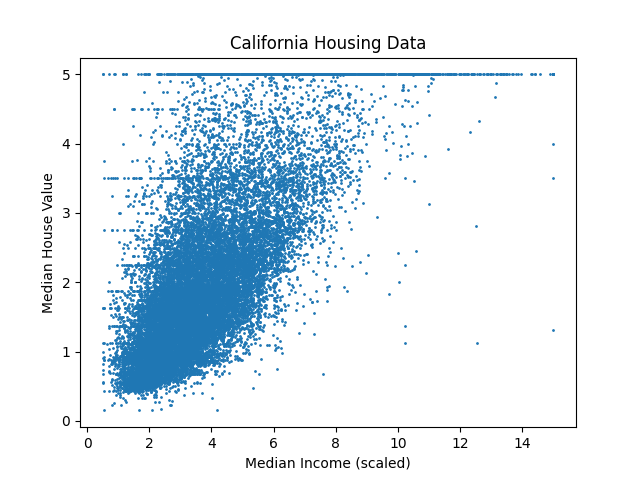

In [12]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing(as_frame=True)
print(housing.data.shape, housing.target.shape)
print(housing.feature_names[0:6])
# select 1 feature ( Feature = MedianIncome )
X = housing.data[["MedInc"]].to_numpy()
# scale feature with standard scaler. Why?; because the range of feature is too large.
#X = (X - X.mean()) / X.std()
# select target ( Target = MedianHouseValue )
y = housing.target.to_numpy()
print(X.shape, y.shape)
# create a scatter plot
fig, ax = plt.subplots()
ax.scatter(X, y, s=1)
ax.set_xlabel("Median Income (scaled)")
ax.set_ylabel("Median House Value")
ax.set_title("California Housing Data")
plt.show()

In [61]:
# lists for storing loss values by epoch
loss_list = []
epoch_list = []

# make the data into a smaller sample for faster training for learning purpose
sample_size = 1000
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X = X[indices]
y = y[indices]
print(X.shape, y.shape)
# set up a model to train on this housing data with batch settings, learning rate, and initial parameters
np.random.seed(42)
# batch settings
batch_size = 10000
n_batches = int(np.ceil(X.shape[0] / batch_size))
# learning rate
learning_rate = 0.05
# set weights (initial parameters) as set value of 1.5
theta = np.array([[1.2]])
print(theta)
# set bias (initial parameters)
bias = 0.1
print(bias)
# set up a figure for animation
fig, ax = plt.subplots()
ax.scatter(X, y, s=1)
line, = ax.plot(X, X.dot(theta) + bias, color='red')
ax.set_ylim(0, 5.5)
ax.set_xlabel("Median Income (scaled)")
ax.set_ylabel("Median House Value")
ax.set_title("California Housing Data with Linear Regression Fit")
plt.close()
# function to update the line for animation
def update_line(frame):
    global theta, bias, X_shuffled, y_shuffled
    # shuffle the data at the beginning of each epoch
    if frame % n_batches == 0:
        # Calculate loss over the entire dataset at the start of each epoch
        y_pred_full = X.dot(theta) + bias
        loss = np.mean((y_pred_full - y.reshape(-1, 1))**2)
        epoch = frame // n_batches
        print(f"Epoch: {epoch}, Loss: {loss:.4f}")
        
        epoch_list.append(epoch)
        loss_list.append(loss)
        
        indices = np.random.permutation(X.shape[0])
        X_shuffled = X[indices]
        y_shuffled = y[indices]
    # get the current batch
    batch_index = frame % n_batches
    start = batch_index * batch_size
    end = min(start + batch_size, X.shape[0])
    X_batch = X_shuffled[start:end]
    y_batch = y_shuffled[start:end]
    # add bias term to the input features
    X_batch_b = np.c_[np.ones((X_batch.shape[0], 1)), X_batch]
    # make predictions
    y_pred = X_batch_b.dot(np.array([bias, theta.item()]).reshape(-1, 1
     ))
    # compute gradients
    error = y_pred - y_batch.reshape(-1, 1)
    gradients = 2 / X_batch_b.shape[0] * X_batch_b.T.dot(error)
    # update parameters
    bias -= learning_rate * gradients[0, 0]
    theta -= learning_rate * gradients[1:, 0].reshape(-1, 1)
    # update the line in the plot
    line.set_ydata(X.dot(theta) + bias)
    return line,
# create the animation
n_frames = 200
ani = FuncAnimation(fig, update_line, frames=n_frames, blit=True, interval=100)
# display the animation
HTML(ani.to_jshtml())


(1000, 1) (1000,)
[[1.2]]
0.1
Epoch: 0, Loss: 10.2632
Epoch: 0, Loss: 9.3257
Epoch: 1, Loss: 8.4794
Epoch: 2, Loss: 7.7154
Epoch: 3, Loss: 7.0258
Epoch: 4, Loss: 6.4033
Epoch: 5, Loss: 5.8413
Epoch: 6, Loss: 5.3340
Epoch: 7, Loss: 4.8761
Epoch: 8, Loss: 4.4627
Epoch: 9, Loss: 4.0895
Epoch: 10, Loss: 3.7526
Epoch: 11, Loss: 3.4484
Epoch: 12, Loss: 3.1739
Epoch: 13, Loss: 2.9260
Epoch: 14, Loss: 2.7022
Epoch: 15, Loss: 2.5001
Epoch: 16, Loss: 2.3177
Epoch: 17, Loss: 2.1531
Epoch: 18, Loss: 2.0044
Epoch: 19, Loss: 1.8701
Epoch: 20, Loss: 1.7489
Epoch: 21, Loss: 1.6395
Epoch: 22, Loss: 1.5407
Epoch: 23, Loss: 1.4515
Epoch: 24, Loss: 1.3709
Epoch: 25, Loss: 1.2981
Epoch: 26, Loss: 1.2325
Epoch: 27, Loss: 1.1731
Epoch: 28, Loss: 1.1196
Epoch: 29, Loss: 1.0712
Epoch: 30, Loss: 1.0275
Epoch: 31, Loss: 0.9880
Epoch: 32, Loss: 0.9524
Epoch: 33, Loss: 0.9202
Epoch: 34, Loss: 0.8911
Epoch: 35, Loss: 0.8648
Epoch: 36, Loss: 0.8411
Epoch: 37, Loss: 0.8197
Epoch: 38, Loss: 0.8003
Epoch: 39, Loss: 0.7

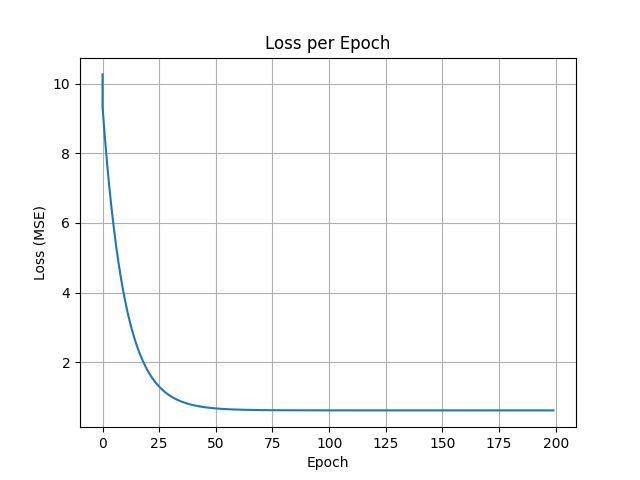

In [63]:
# Create a new figure for the loss plot
fig_loss, ax_loss = plt.subplots()
ax_loss.plot(epoch_list, loss_list)
ax_loss.set_xlabel("Epoch")
ax_loss.set_ylabel("Loss (MSE)")
ax_loss.set_title("Loss per Epoch")
ax_loss.grid(True)
plt.show()